Data Science<br>
CSE 2016118274 HyunWook, Hong

In [0]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta,date
from scipy import stats
from scipy.optimize import curve_fit

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from random import random

import seaborn as sns
import matplotlib.pyplot as plt
import gc
import fbprophet


%config InlineBackend.figure_format = 'retina'

In [0]:
plt.rc("font", family="AppleGothic")
plt.rc('axes', unicode_minus=False)

In [3]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_covid19.index=df_covid19["Country_Region"]
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,,,,
Australia,Australia,2020-04-04 16:43:30,-25.0000,133.0000,5550,30,701,4819
Austria,Austria,2020-04-04 16:36:16,47.5162,14.5501,11781,186,2507,9088
Canada,Canada,2020-04-04 16:43:15,60.0010,-95.0010,12920,215,2517,0
China,China,2020-04-04 14:03:32,30.5928,114.3055,82543,3330,76946,2267
Denmark,Denmark,2020-04-04 16:36:16,56.0000,10.0000,4268,161,1379,2728


In [4]:
df_covid19.sort_values(by="Confirmed", ascending=False )

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,,,,
US,US,2020-04-04 16:36:35,40.000000,-100.000000,290606,7826,9853,0
Spain,Spain,2020-04-04 16:36:16,40.463667,-3.749220,124736,11744,34219,78773
Italy,Italy,2020-04-04 16:36:16,41.871900,12.567400,124632,15362,20996,88274
Germany,Germany,2020-04-04 16:36:16,51.165700,10.451500,92150,1330,26400,64420
France,France,2020-04-04 16:36:16,46.227600,2.213700,83031,6521,14138,62372
...,...,...,...,...,...,...,...,...
Belize,Belize,2020-04-04 16:36:16,17.189900,-88.497600,4,0,0,4
Sierra Leone,Sierra Leone,2020-04-04 16:36:16,8.460555,-11.779889,4,0,0,4
Burundi,Burundi,2020-04-04 16:36:16,-3.373100,29.918900,3,0,0,3


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


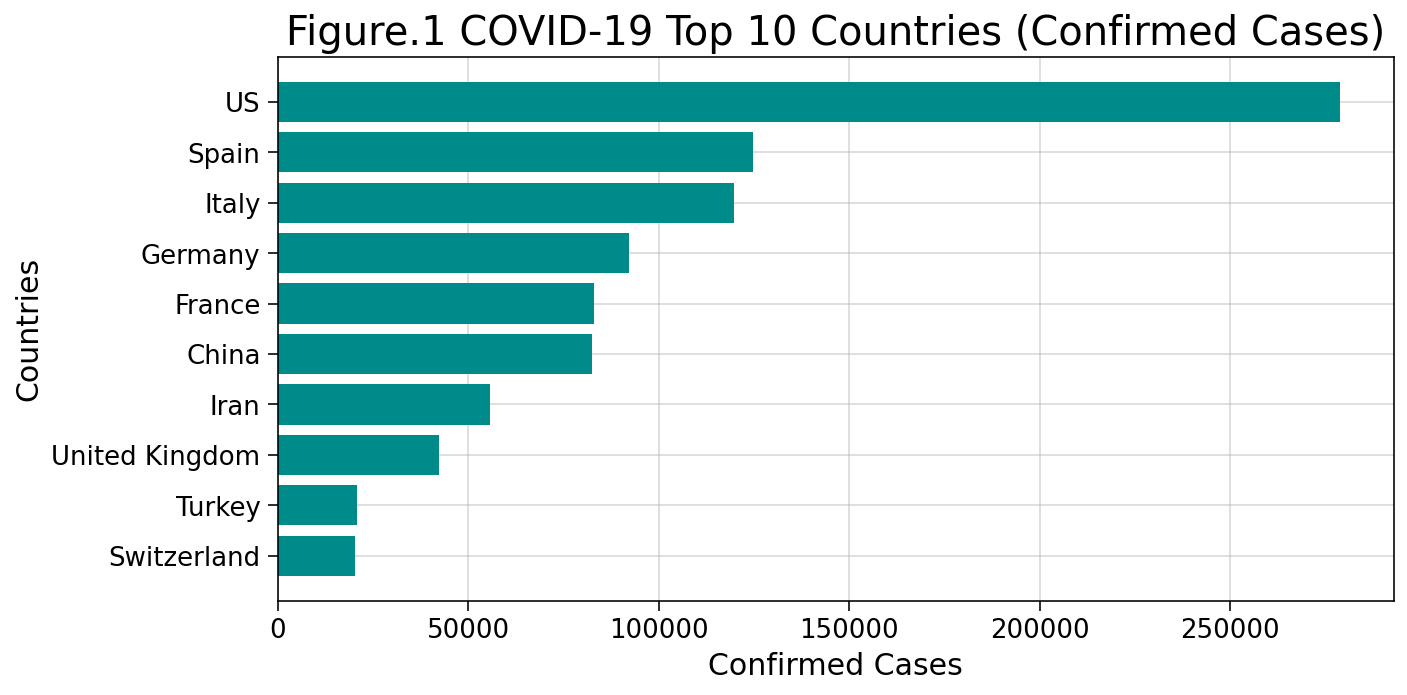

In [5]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_covid19.sort_values('Confirmed')["Confirmed"].index[-10:],df_covid19.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=15)
plt.ylabel("Countries",fontsize=15)
plt.title("Figure.1 COVID-19 Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.5)
plt.show()

In [5]:
from google.colab import files

upload = files.upload()

Saving us_states_covid19_daily.csv to us_states_covid19_daily.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
features = ['Province_State','Country_Region','Date','ConfirmedCases','Fatalities']
df=pd.read_csv("train.csv",usecols=features)
df.fillna(' ',inplace=True)
df['Lat']=df['Province_State']+df['Country_Region']
top10=df
df['ConfirmedCases_cum'] = df.groupby(['Country_Region','Date'])['ConfirmedCases'].transform(pd.Series.sum)
top10 = df.groupby(['Country_Region']).agg({ 'Country_Region':'min','ConfirmedCases': 'sum'})
countries_list=df.Lat.unique()


In [10]:
top10Countries = top10.sort_values(['ConfirmedCases'],ascending=False)['Country_Region'].head(10).to_numpy()
display(top10Countries)

array(['China', 'Italy', 'US', 'Spain', 'Germany', 'Iran', 'France',
       'Korea, South', 'United Kingdom', 'Switzerland'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:779: MatplotlibDeprecationWarning:

Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.



[Text(0, 0, '2020-01-22'),
 Text(1, 0, '2020-01-23'),
 Text(2, 0, '2020-01-24'),
 Text(3, 0, '2020-01-25'),
 Text(4, 0, '2020-01-26'),
 Text(5, 0, '2020-01-27'),
 Text(6, 0, '2020-01-28'),
 Text(7, 0, '2020-01-29'),
 Text(8, 0, '2020-01-30'),
 Text(9, 0, '2020-01-31'),
 Text(10, 0, '2020-02-01'),
 Text(11, 0, '2020-02-02'),
 Text(12, 0, '2020-02-03'),
 Text(13, 0, '2020-02-04'),
 Text(14, 0, '2020-02-05'),
 Text(15, 0, '2020-02-06'),
 Text(16, 0, '2020-02-07'),
 Text(17, 0, '2020-02-08'),
 Text(18, 0, '2020-02-09'),
 Text(19, 0, '2020-02-10'),
 Text(20, 0, '2020-02-11'),
 Text(21, 0, '2020-02-12'),
 Text(22, 0, '2020-02-13'),
 Text(23, 0, '2020-02-14'),
 Text(24, 0, '2020-02-15'),
 Text(25, 0, '2020-02-16'),
 Text(26, 0, '2020-02-17'),
 Text(27, 0, '2020-02-18'),
 Text(28, 0, '2020-02-19'),
 Text(29, 0, '2020-02-20'),
 Text(30, 0, '2020-02-21'),
 Text(31, 0, '2020-02-22'),
 Text(32, 0, '2020-02-23'),
 Text(33, 0, '2020-02-24'),
 Text(34, 0, '2020-02-25'),
 Text(35, 0, '2020-02-26'),
 T

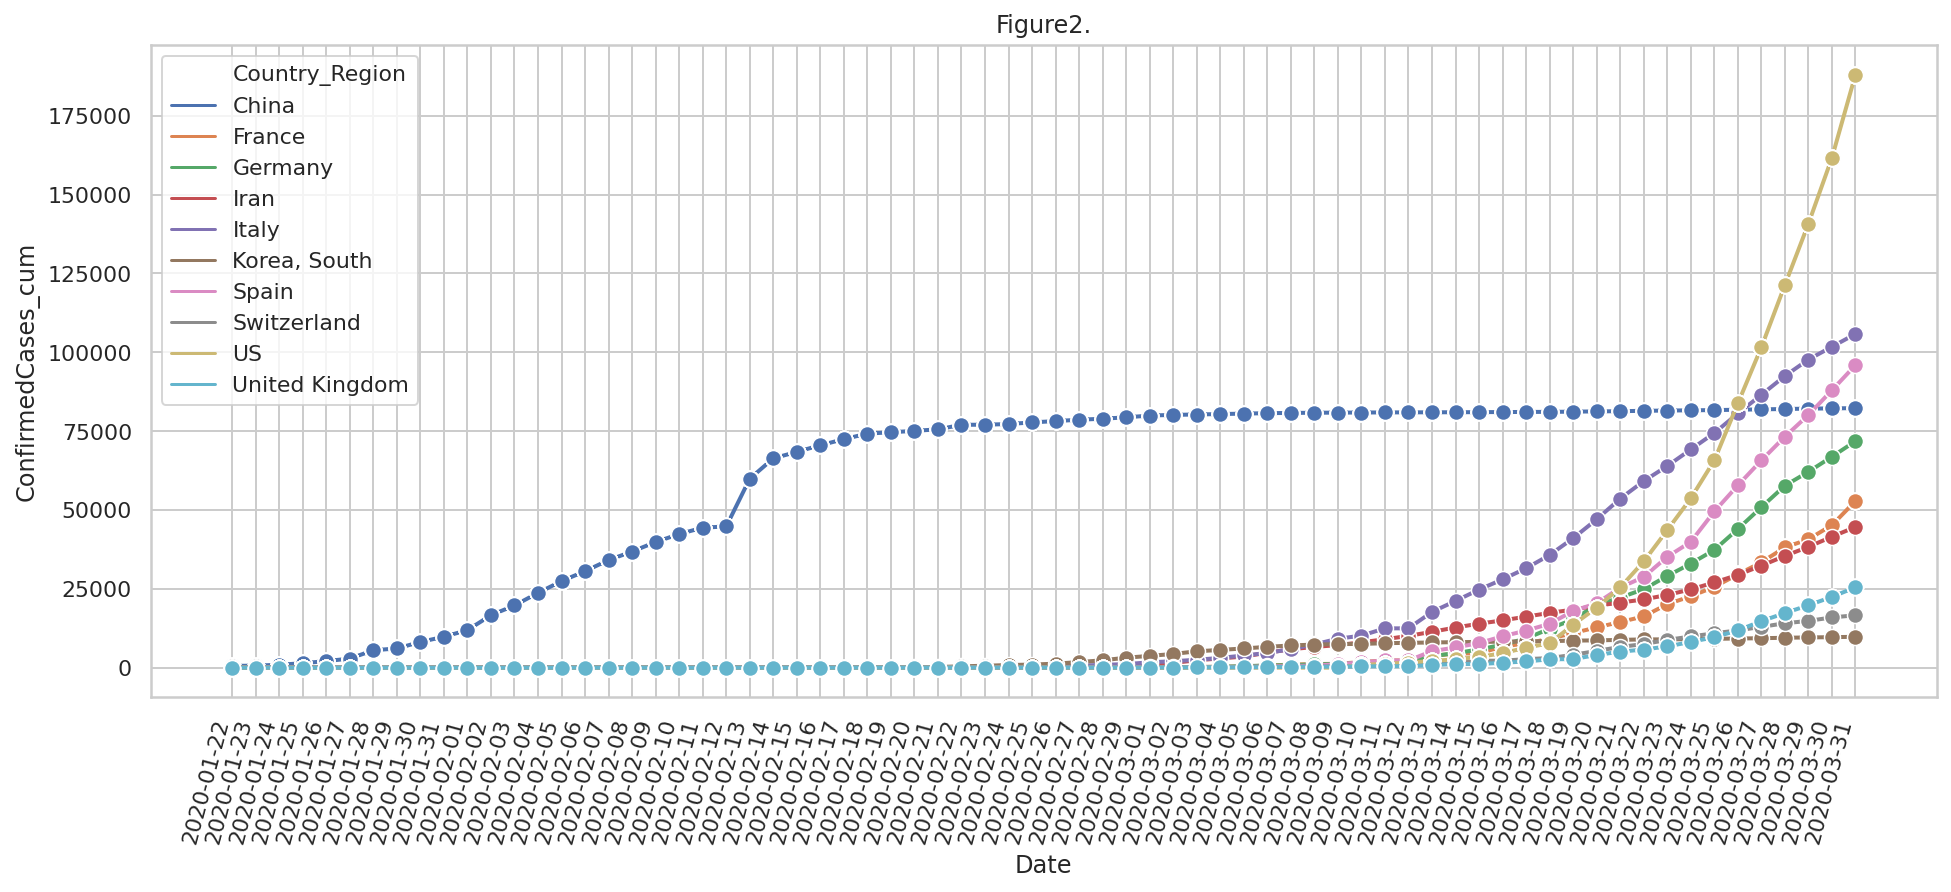

In [11]:
sns.set() 
df_top=df.loc[df['Country_Region'].isin(top10Countries)]
df_top=df_top.drop('Lat',axis=1 )
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
ax = sns.lineplot(x="Date", y="ConfirmedCases_cum", hue="Country_Region",
                   estimator=None, lw=1, 
                  data=df_top, #df[df["Country"Reigon"]=="US"]
                  marker='o',markersize=8,linewidth=2)
ax.set_title("Figure2.")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right')

In [7]:
df_us = pd.read_csv('us_states_covid19_daily.csv')
df_us.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200329,AK,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29T20:00:00Z,3334,2,0.0,1.0,396.0,17.0,413.0
1,20200329,AL,806.0,4184.0,NaN,NaN,4.0,4990,9dbf0b598d35897b1f6857899d0a834990f4ec51,2020-03-29T20:00:00Z,4990,1,1.0,0.0,0.0,110.0,110.0
2,20200329,AR,426.0,3027.0,NaN,48.0,6.0,3453,2c8ed5059d37cc0aa0d20f4f3066a64db930c6c5,2020-03-29T20:00:00Z,3453,5,1.0,0.0,89.0,22.0,111.0
3,20200329,AS,NaN,NaN,NaN,NaN,0.0,0,f2050b47409f64a09bb4e959284c05d25eca8832,2020-03-29T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,20200329,AZ,919.0,12953.0,NaN,78.0,17.0,13872,14deca609d3762fb4b92807785e2b9c7015661e6,2020-03-29T20:00:00Z,13872,4,2.0,78.0,5498.0,46.0,5544.0


In [0]:
df_cleaning = df_us.copy()

df_cleaning['date'] = df_cleaning['date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))

df_cleaning = df_cleaning.rename(columns={'total':'total_tests_inc_pending', 
                                          'totalTestResults':'total_tests', 
                                          'death':'deaths'})
df_cleaning = df_cleaning.drop(columns=['dateChecked',
                                        'hash',
                                        'fips', 
                                        'deathIncrease',
                                        'hospitalizedIncrease',
                                        'negativeIncrease',
                                        'positiveIncrease',
                                        'totalTestResultsIncrease'])

state_dict = {}
for state in df_cleaning.state.unique():
    state_df = df_cleaning[df_cleaning['state']==state].copy()
    state_df = state_df.sort_values(by='date', ascending=True)
    state_df = state_df.reset_index(drop=True)
    state_df.loc[0] = state_df.loc[0].fillna(0)
    state_df.index = state_df.index + 1
    state_df = state_df.fillna(method='ffill')
    state_dict[state] = state_df
    
df = pd.DataFrame()
for state_df in state_dict.values():
    df = pd.concat([df, state_df])
df= df.reset_index()


In [0]:
def format_plot(fig):
    plt.xlabel('Data')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', fontsize='large')
  
def best_and_worst(df, rank_on, y_label, states_per_plot=5, more_is_worse=True):
    most_recent_day = df.date.max()
    if more_is_worse:
        ranked = df[df['date']==most_recent_day].sort_values(by=rank_on, ascending=False)
    else:
        ranked = df[df['date']==most_recent_day].sort_values(by=rank_on, ascending=True)
    worst = ranked.head(states_per_plot).state
    best = ranked.tail(states_per_plot).state

    fig=plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    for state in worst:
        state_df = df[df['state']== state].copy()
        plt.plot(state_df.date, state_df[rank_on], label=state)
        plt.title('Worst States')
        plt.ylabel(y_label)
        format_plot(fig)
    plt.subplot(1, 2, 2)
    for state in best:
        state_df = df[df['state']== state].copy()
        plt.plot(state_df.date, state_df[rank_on], label=state)
        plt.title('Best States')
        plt.ylabel(y_label)
        format_plot(fig)
        
    plt.show()
    

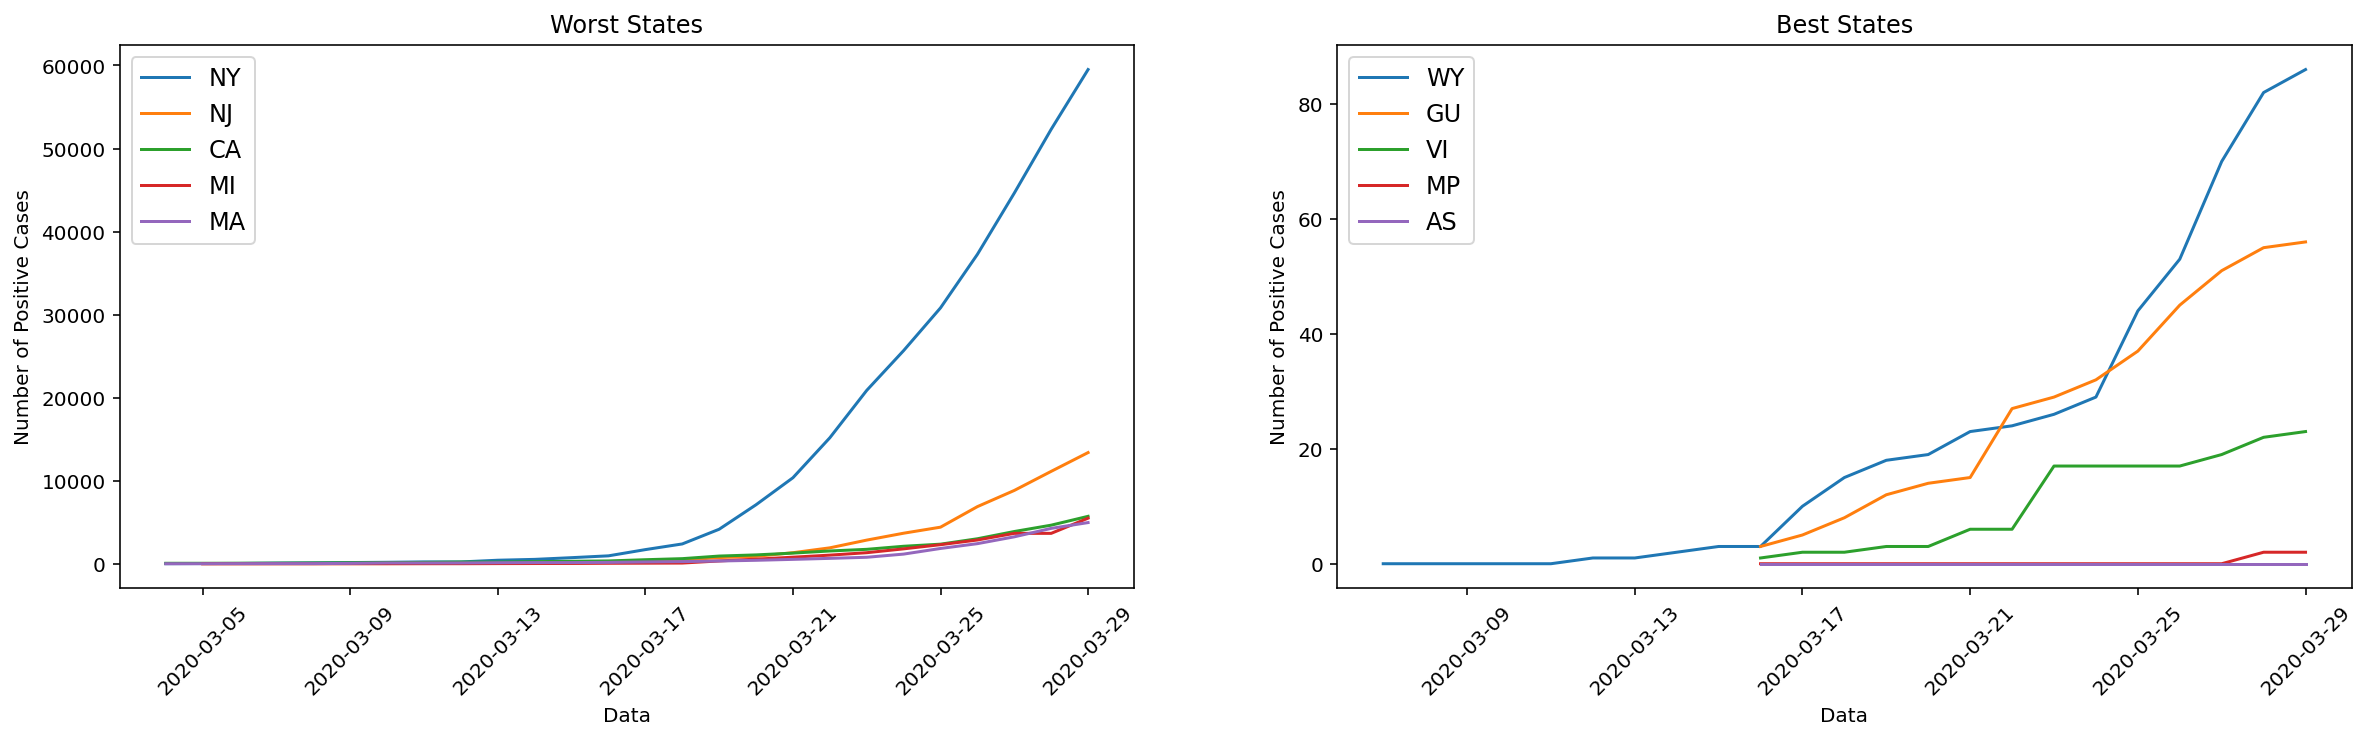

In [20]:
best_and_worst(df=df, rank_on='positive', y_label='Number of Positive Cases')

In [0]:
def get_lin_exp_fits(state_df, col='positive'):
    #linear regression
    linear_coeffs = stats.linregress(x=state_df.index, y=state_df[col])
    positive_values = state_df[col]>0
    #exp regression
    exp_coeffs = stats.linregress(x=state_df.index[positive_values], y=np.log(state_df.loc[positive_values, col]))
    return linear_coeffs, exp_coeffs

def plot_lin_vs_exp(state_df, col='positive', y_label='Number of Positive Cases'):
    linear_coeffs, exp_coeffs = get_lin_exp_fits(state_df, col=col)
    
    # Plot the results.
    fig=plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    plt.plot(state_df.date, state_df[col], label="NY")
    plt.plot(state_df.date,  linear_coeffs[1] + state_df.index*linear_coeffs[0], label="linear prediction")
    plt.title('Figure4. Linear Regression')
    plt.ylabel(y_label)
    format_plot(fig)
    plt.subplot(1, 3, 2)
    plt.plot(state_df.date, state_df[col], label="NY")
    plt.plot(state_df.date,  np.exp(exp_coeffs[1])  * (np.exp(exp_coeffs[0])**state_df.index), label="exp prediction")
    plt.title('Exponential Regression')
    plt.ylabel(y_label)
    format_plot(fig)

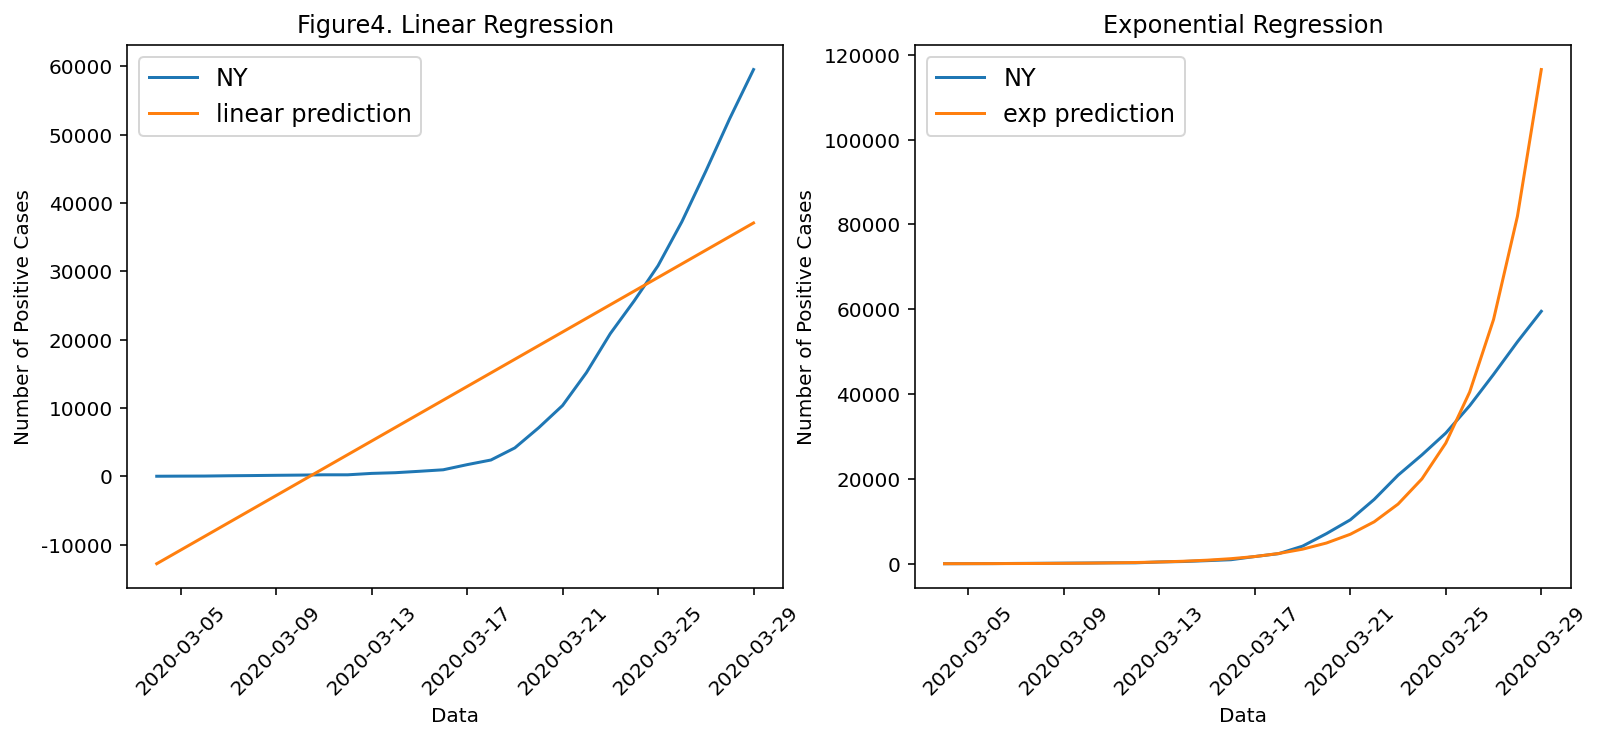

In [39]:
plot_lin_vs_exp(state_df=state_dict["NY"])